## Шаг 1: Загрузка и анализ данных

### 1. Загрузка датасета Iris:

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### 2. Корреляции между признаками:

In [2]:
# Корреляции по всей таблице
correlation_matrix = df.iloc[:, :-2].corr()
print("Корреляции между признаками:\n", correlation_matrix)

# Корреляции для каждого класса
class_correlations = df.groupby('species').apply(lambda x: x.iloc[:, :-2].corr())
print("\nКорреляции между признаками для каждого класса:\n", class_correlations)


Корреляции между признаками:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  

Корреляции между признаками для каждого класса:
                               sepal length (cm)  sepal width (cm)  \
species                                                             
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   

C:\Users\snytk\AppData\Local\Temp\ipykernel_10432\25813802.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_correlations = df.groupby('species').apply(lambda x: x.iloc[:, :-2].corr())


### 3. Визуализация распределений классов:

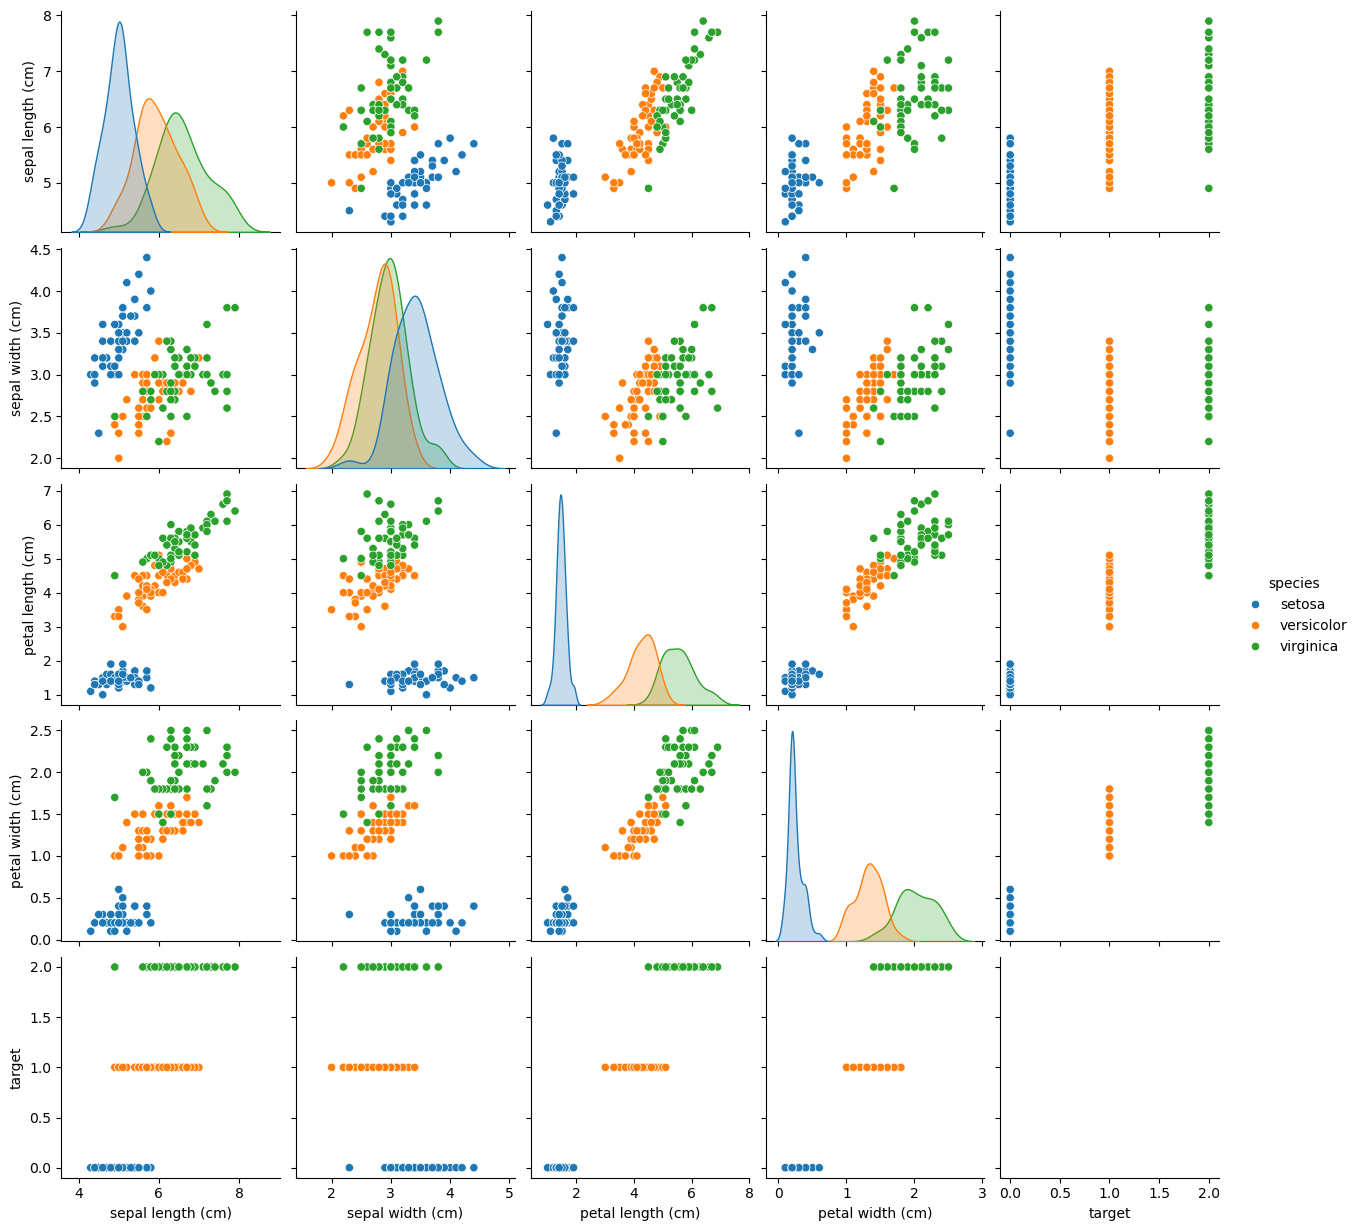

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

## Шаг 2: Построение и визуализация разделяющих кривых

### 1. Выбор двух признаков и обучение классификаторов:

Точность логистической регрессии: 0.82
Точность квадратичного дискриминантного анализа: 0.80
Точность линейного SVM: 0.80
Точность квадратичного SVM: 0.73


C:\Users\snytk\AppData\Local\Temp\ipykernel_10432\2056748087.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X.iloc[:, 0], X.iloc[:, 1], edgecolor='k', cmap=plt.cm.RdYlBu)
C:\Users\snytk\AppData\Local\Temp\ipykernel_10432\2056748087.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X.iloc[:, 0], X.iloc[:, 1], edgecolor='k', cmap=plt.cm.RdYlBu)
C:\Users\snytk\AppData\Local\Temp\ipykernel_10432\2056748087.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X.iloc[:, 0], X.iloc[:, 1], edgecolor='k', cmap=plt.cm.RdYlBu)
C:\Users\snytk\AppData\Local\Temp\ipykernel_10432\2056748087.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X.iloc[:, 0], X.iloc[:, 1], edgecolor='k', cmap=plt.cm.RdYlBu)


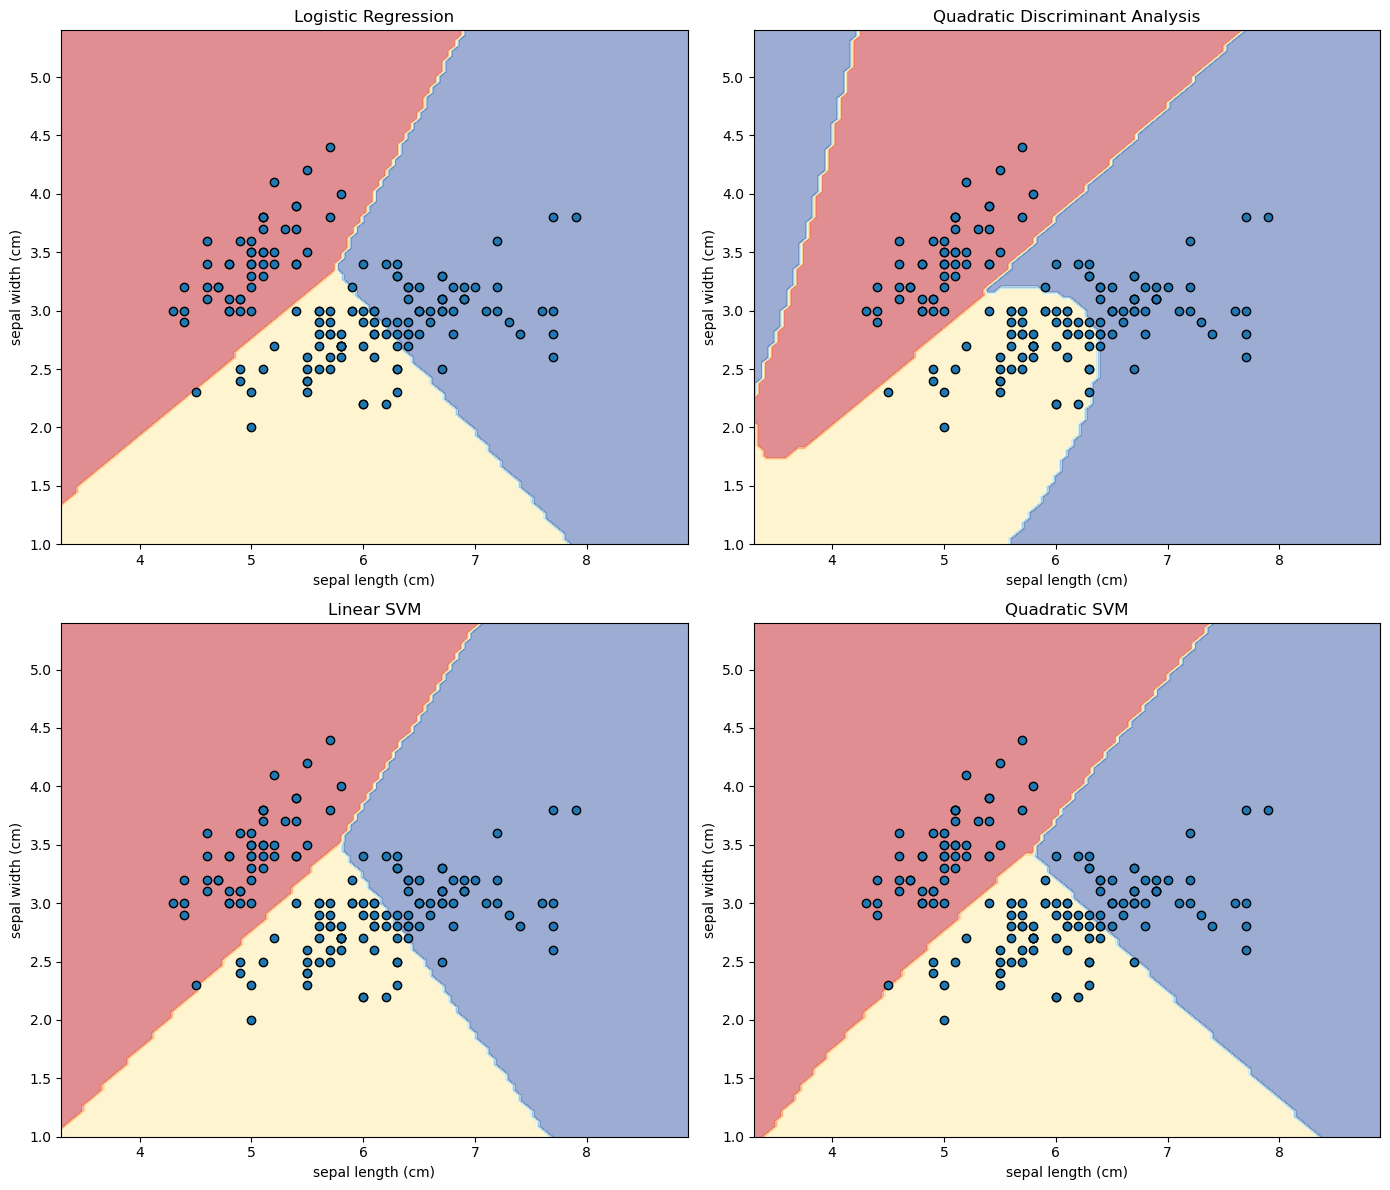

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Выбираем два признака, например, 'sepal length' и 'sepal width'
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['species']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Квадратичный дискриминантный анализ
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)

# Линейное SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)

# Квадратичное SVM
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)

print(f"Точность логистической регрессии: {accuracy_log_reg:.2f}")
print(f"Точность квадратичного дискриминантного анализа: {accuracy_qda:.2f}")
print(f"Точность линейного SVM: {accuracy_svm_linear:.2f}")
print(f"Точность квадратичного SVM: {accuracy_svm_poly:.2f}")

# Визуализация границ решений
def plot_decision_boundary(clf, X, y, ax, title):
    DecisionBoundaryDisplay.from_estimator(clf, X, response_method='predict', ax=ax, cmap=plt.cm.RdYlBu, alpha=0.5)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], edgecolor='k', cmap=plt.cm.RdYlBu)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

plot_decision_boundary(log_reg, X, y, axes[0, 0], "Logistic Regression")
plot_decision_boundary(qda, X, y, axes[0, 1], "Quadratic Discriminant Analysis")
plot_decision_boundary(svm_linear, X, y, axes[1, 0], "Linear SVM")
plot_decision_boundary(svm_poly, X, y, axes[1, 1], "Quadratic SVM")

plt.tight_layout()
plt.show()

## Шаг 3: Линейный дискриминантный анализ

### 1. Построение и визуализация линейного дискриминанта на всех объектах:

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
X_lda = lda.transform(X)

df_lda = pd.DataFrame(X_lda, columns=['LD1'])
df_lda['species'] = y

sns.pairplot(df_lda, hue='species')
plt.show()

ValueError: Shape of passed values is (150, 2), indices imply (150, 1)

## Шаг 4: Реализация квадратичной разделяющей функции

### Реализация квадратичной разделяющей функции:

In [ ]:
import numpy as np

def quadratic_discriminant(X, y):
    classes = np.unique(y)
    mean_vectors = []
    cov_matrices = []
    priors = []
    
    for cls in classes:
        X_cls = X[y == cls]
        mean_vectors.append(np.mean(X_cls, axis=0))
        cov_matrices.append(np.cov(X_cls, rowvar=False))
        priors.append(X_cls.shape[0] / X.shape[0])
    
    def discriminant_function(x):
        results = []
        for i, cls in enumerate(classes):
            mean_vec = mean_vectors[i]
            cov_matrix = cov_matrices[i]
            prior = priors[i]
            inv_cov_matrix = np.linalg.inv(cov_matrix)
            diff = x - mean_vec
            result = -0.5 * np.log(np.linalg.det(cov_matrix)) - 0.5 * diff.T @ inv_cov_matrix @ diff + np.log(prior)
            results.append(result)
        return np.argmax(results)
    
    return discriminant_function

# Реализация на двух переменных из пункта 2
def plot_quadratic_boundary(X, y, discriminant_func):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = np.array([discriminant_func(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Quadratic Discriminant Function")
    plt.show()

# Квадратичная разделяющая функция
qd_func = quadratic_discriminant(X, y)
plot_quadratic_boundary(X, y, qd_func)